# BioLizardStylePython In Action

## Installation

### 1. Extra requirements

`BioLizardStylePython` relies on the colorspace package, which is not available on the Python Package Index (PyPI). However, it is hosted on GitHub and needs to be installed directly from there. To install the `colorspace` package, please run the following command in your terminal:

In [ ]:
pip install git+https://github.com/retostauffer/python-colorspace.git

Once you've successfully installed `colorspace`, you can proceed with the installation and usage of `BioLizardStylePython`.

### 2. Package Installation

The BioLizardStylePython package is available on PyPI and can be easily installed using:

In [ ]:
pip install BioLizardStylePython


### 3. Font Installation

#### Check Local Installation
First, check if you have the Nunito Sans font locally installed on your system.

---

#### Option 1: Download and Install from GitHub
If you don't have the Nunito Sans font locally installed, you can download and install it from GitHub.

1. **Download Fonts**: Download the two font files from the GitHub repository [Nature Grade Visualization Playground](https://github.com/lizard-bio/nature-grade-visualization-playground/tree/main).
2. **Install Fonts**: Install the downloaded fonts on your system.
3. **Complete**: Once the installation is done, you're all set to use the font.

---

#### Option 2: Already Installed
If you find that the Nunito Sans font is **already installed**, there is no need for reinstallation.

- **Identify Font Name**: Run the code snippet below to identify the specific name of your installed Nunito Sans font. This is essential as you'll need to pass this exact name to the `lizard_style()` function in the `font_name` argument. The default is 'Nunito Sans 10pt'.

<div style="background-color: #f7f7f7; padding: 15px; border-radius: 4px; border-left: 5px solid red; margin-top: 20px;">
<details>
  <summary><b>Common Issue</b></summary>

  If matplotlib is previously installed, you might need to delete the existing local font cache of matplotlib for it to recognize the Nunito Sans font.

  You can find the dir of the cache by running `import matplotlib as mpl; print(mpl.get_cachedir())`.
</details>
</div>


In [1]:
import matplotlib as mpl
print(mpl.get_cachedir())

/home/ameijer/.cache/matplotlib


In [16]:
from matplotlib import font_manager

# Get the list of installed fonts
fonts = font_manager.fontManager.ttflist
nunito_font_names = [font.name for font in fonts if 'nunito' in font.name.lower()]
lato_font_names = [font.name for font in fonts if 'lato' in font.name.lower()]
print(set(nunito_font_names))
print(set(lato_font_names))

{'Nunito Sans 10pt'}
{'Lato'}


## Usage & Examples

### 1. Applying the style sheet: lizard_style()
The package includes **a built-in style sheet**, designed to standardize and enhance the visual appeal of your plots. This style sheet configures various elements, ranging from fonts and font sizes to axis and grid settings, and even the default colors for multiple lines in a plot. Applying this style, which is also possible in the R package with + lizard_style() provides a **consistent look**, whether you're using ggplot in R or matplotlib/seaborn in Python.

You can apply the Biolizard-look by placing `lizard_style()` at the top of your scripts after importing BioLizardStylePython. Please note that `lizard_style()` serves as a starting template and may not be the ideal style for every plot. You can easily customize individual style settings by placing your overrides after calling the `lizard_style()` function. Use plt.style.use('default') to return back to the default style.

Here's a demonstration of how a simple line plot would look before and after applying the `lizard_style()`:

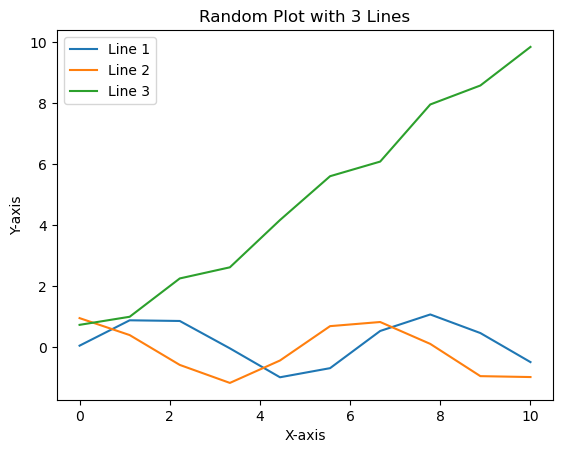

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from BioLizardStylePython import *
np.random.seed(42)

# Function to create random lineplot
def create_line_plot():
    x = np.linspace(0, 10, 10)
    y1 = np.sin(x) + np.random.normal(0, 0.1, size=x.shape)
    y2 = np.cos(x) + np.random.normal(0, 0.1, size=x.shape)
    y3 = x + np.random.normal(0, 0.5, size=x.shape)
    plt.figure()
    plt.plot(x, y1, label='Line 1')
    plt.plot(x, y2, label='Line 2')
    plt.plot(x, y3, label='Line 3')
    plt.title('Random Plot with 3 Lines')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()

create_line_plot()

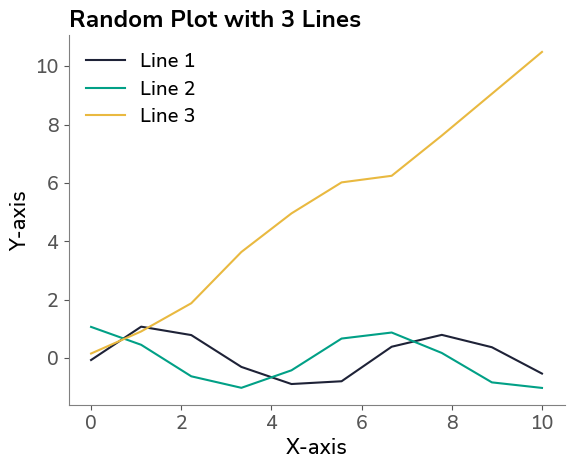

In [2]:
lizard_style()
create_line_plot()

### 2. Using the qualitative color palette

The `biolizard_qualitative_pal()` function **retrieves a predefined qualitative colormap**. For instance, `biolizard_qualitative_pal().colors` returns a list of all 12 colors in hex code. Calling `biolizard_qualitative_pal()(0)` fetches the first color in the palette, while `biolizard_qualitative_pal()(range(5))` retrieves the first five colors.

This palette is inspired by Martin Krzywinski's "12-Color Palette for Color Blindness," yet also incorporates the signature colors of BioLizard for its **<span style="color:#01a086">first</span> <span style="color:#1e2237">three</span> <span style="color:#e9b940">shades</span>**. Specifically designed to be **inclusive**, it is suitable for individuals with the most common form of color blindness: Deuteranopia (Red-Green Color Blindness).

Here's two examples illustrating how to use this function:

/tmp/ipykernel_14747/3626689180.py:6: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.swarmplot(x="species", y="sepal_length", hue ="species", data=data, palette=biolizard_qualitative_pal().colors)


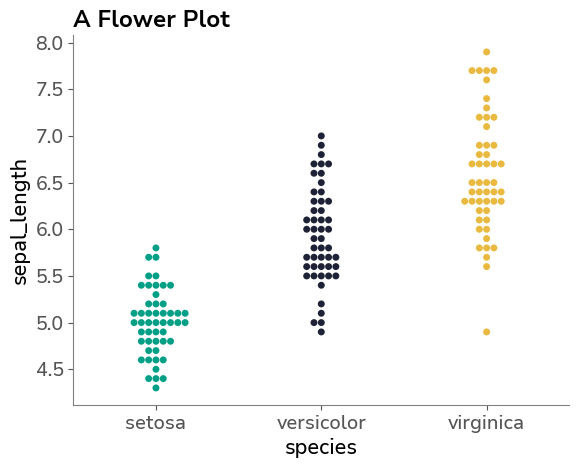

In [3]:
#Example 1
import seaborn as sns
# Sample data
data = sns.load_dataset("iris")
# Using the colormap in Seaborn's swarmplot
sns.swarmplot(x="species", y="sepal_length", hue ="species", data=data, palette=biolizard_qualitative_pal().colors)
plt.title('A Flower Plot')
plt.show()

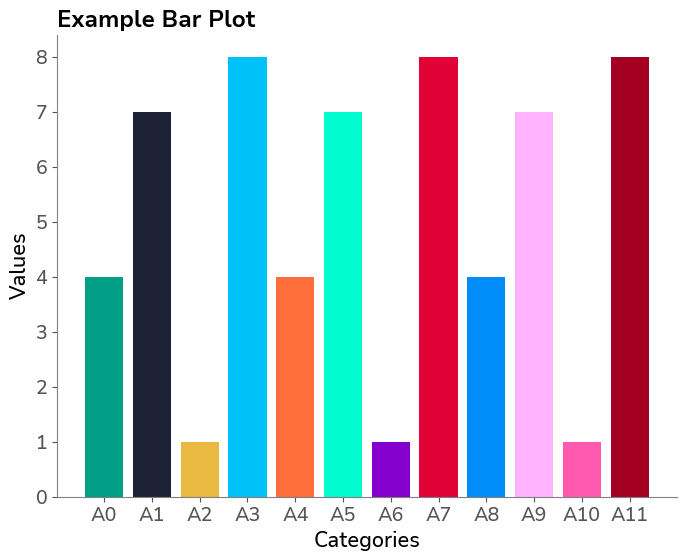

In [4]:
#Example 2
# Data for the bar plot
categories = ['A'+str(i) for i in range(12)]
values = [4, 7, 1, 8]*3

# Generate colors from the qualitative palette
palette= biolizard_qualitative_pal()
bar_colors = [palette(i) for i in range(len(categories))]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=bar_colors)

# Add title and labels
plt.title('Example Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')

plt.show()

### 3. Using the sequential & divergent color map

When you load this package, it automatically **registers two new colormaps in matplotlib**: a Sequential colormap and a Divergent colormap: **"biolizard_sequential_pal"** and **"biolizard_divergent_pal"**. Both **strings** are now recognized my matplotlib.

#### Sequential

The Sequential Biolizard Color Map is tailored to depict underlying numerical values via a uniform progression in luminance. It employs the distinctive **<span style="color:#01a086">BioLizard green</span>** as its base hue. The palette uses HCL gradients for better perceptual uniformity compared to RGB, and uses a triangular chroma progression to distinguish middle-range values from extremes.

#### Divergent

This colormap is specifically designed for scenarios where the color corresponds to numerical values that have a natural midpoint. It utilizes a triangular luminance sequence with differing hues in each "arm" of the palette. Chroma and luminance are balanced between the two arms, and the neutral central value has zero chroma. The palette employs hues **<span style="color:#A329E2">291</span>** and **<span style="color:#01a086">170</span>**, the latter being Biolizard's distinctive green. This hue combination ensures that the palette is accessible for all major forms of color blindness.

Here an example illustrating how to use these palettes:

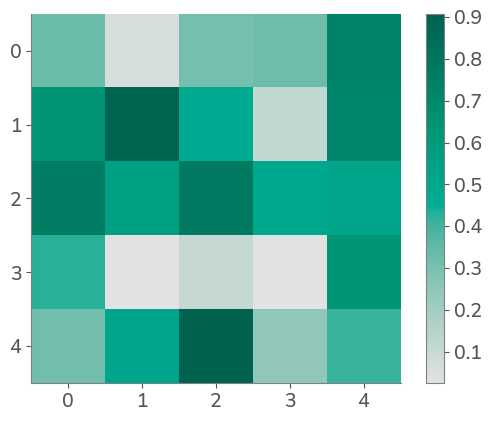

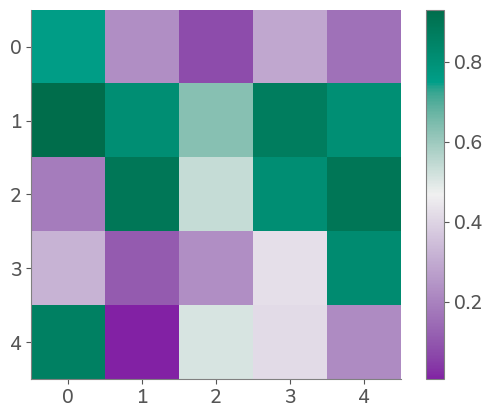

In [5]:
data = np.random.rand(5, 5)  # Example data
plt.imshow(data, cmap='biolizard_sequential_pal')
plt.colorbar()
plt.show()

data = np.random.rand(5, 5)  # Example data
plt.imshow(data, cmap='biolizard_divergent_pal')
plt.colorbar()
plt.show()

### 4. Appending a BioLizard footer: finalise_lizardplot()

The `finalise_lizardplot` function finalizes a matplotlib plot by appending a footer at the bottom and saving the resulting image. The footer includes a BioLizard logo and a customizable source text.

#### Parameters

- `plot`: The input matplotlib figure to be finalized.
- `source_text`: The source text to display at the bottom.
- `fontsize`: (Optional) Font size of the source text. Defaults to 12.
- `pdf`: (Optional) If True, saves as PDF. Otherwise, saves as PNG. Defaults to False.
- `output_name`: (Optional) Name of the output file. Defaults to "TempLizardPlot".
- `save_filepath`: (Optional) Full path to save the output. Takes precedence over `output_name`.

Here's an example:


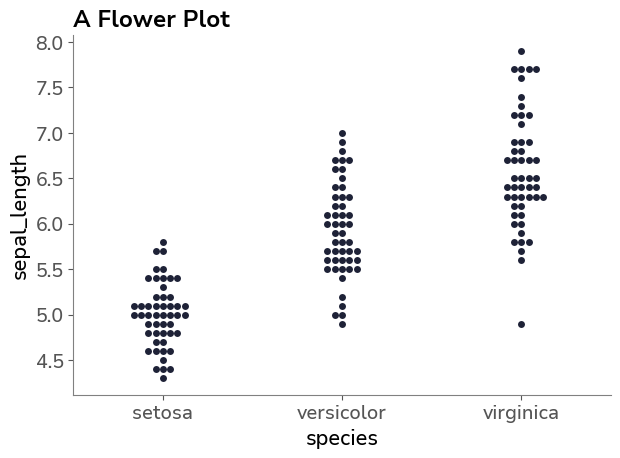

In [25]:
import seaborn as sns
data = sns.load_dataset("iris")
fig = plt.figure()
sns.swarmplot(x="species", y="sepal_length", data=data)
plt.title('A Flower Plot')
finalise_lizardplot(fig,
                  'Source: https://en.wikipedia.org/wiki/Iris_flower_data_set ',
                  fontsize=10, pdf=True, output_name='An_Iris_Plot')

#Please take a look in your current working directory to see the result!